# FBRESNET - one example

In [47]:
# Import Packages
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [49]:
# Import local model files
from FBRN.myfunc import Physics
from FBRN.myfunc import MyMatmul
from FBRN.main import FBRestNet
from FBRN.model import MyModel
from FBRN.myfunc import Export_hyper

### Initialisation
The condition are as follows:
$a=1$ ,
$p=1$ ,
the constraint is $0 <x_i <1$ .

In [50]:
exp1 = FBRestNet(experimentation=Physics(2000,50,1,1), nb_blocks=20, noise = 0.05,folder = './../', im_set="Set1",batch_size=[600,1],lr=1e-3, nb_epochs=[30,1])


### Dataset

In [51]:
train_set, val_set = exp1.CreateDataSet(save='no')

### Trainings
The training is done over 20 epochs, learning rate is $10^{-3}$.
The Lipschitz constant is plot duroing training.
Here the parameter can be saved after training in file 'Trainings', and uploaded later. (50 min)

epoch :  0  -----  validation :  0.000163075
    ----- initial error :  0.000881967
epoch :  1  -----  validation :  0.000145207
    ----- initial error :  0.000881967
epoch :  2  -----  validation :  0.000132579
    ----- initial error :  0.000881967
epoch :  3  -----  validation :  0.000124123
    ----- initial error :  0.000881967
epoch :  4  -----  validation :  0.000118875
    ----- initial error :  0.000881967
epoch :  5  -----  validation :  0.000115185
    ----- initial error :  0.000881967
epoch :  6  -----  validation :  0.000113191
    ----- initial error :  0.000881967
epoch :  7  -----  validation :  0.000111694
    ----- initial error :  0.000881967
epoch :  8  -----  validation :  0.00011083
    ----- initial error :  0.000881967
epoch :  9  -----  validation :  0.000110322
    ----- initial error :  0.000881967
epoch :  10  -----  validation :  0.000109861
    ----- initial error :  0.000881967
epoch :  11  -----  validation :  0.000109542
    ----- initial error :  0.0

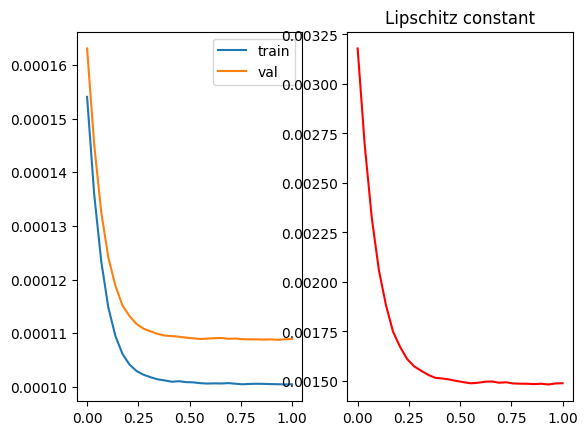

Final Lipschitz constant =  0.0014883463751526195


In [6]:
#exp1.train(train_set,val_set,save_model=False)

### Save the model

In [52]:
model_save_path = '../Trainings/'
trained_model = 'model_example.pt'
# torch.save(exp1.state_dict(), model_save_path+trained_model)

### Load the model

In [53]:
exp1.load_state_dict(torch.load(model_save_path+trained_model))

<All keys matched successfully>

### Testing
We computre the averaged error over the testing set, and compute one example, on the left the signal are projected on the eigenbasis of operator $T_a^TT_a$, on the right on the finite element basis.

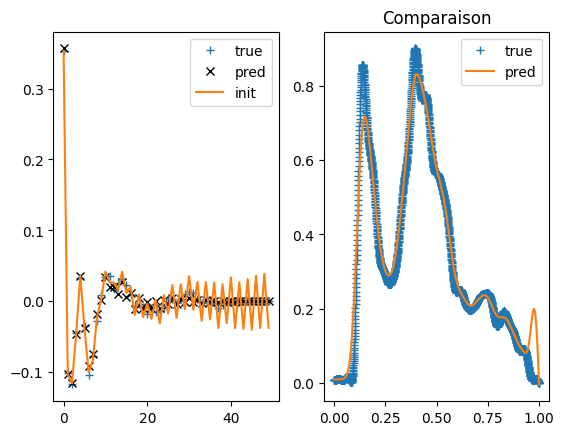

Erreur de sortie :  0.016677087299103072
Erreur initiale :  0.11858313907232645


In [54]:
average_error = exp1.test(val_set)

### Test on a Gaussian function

<class 'str'>
|x-xp|/|x| = 0.10563849888655036


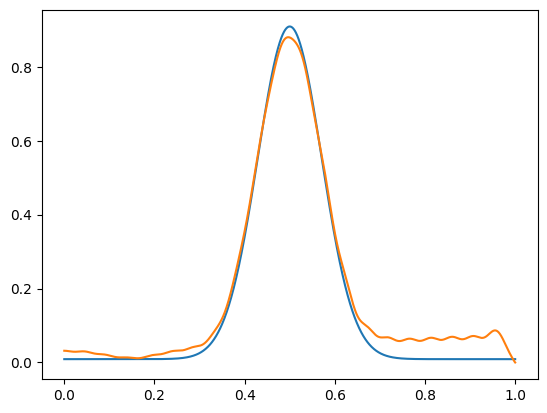

In [59]:
exp1.test_gauss(noise=0.05)

### Lipschitz constant

Here we implement for the Gaussian signal the lipschitz constant of the neural network, depending on the input. s or if 

$x_{in}=x_{bias}=T_a^T y^\delta$ 

In [11]:
exp1.model.Lipschitz(opt1="semi",opt2="entree11")

0.04969120621269468

$x_{in}= 0$, and $x_{bias}= T_a^T y^\delta$ 

In [12]:
exp1.model.Lipschitz(opt1="semi",opt2="entree01")

0.001487419150966925

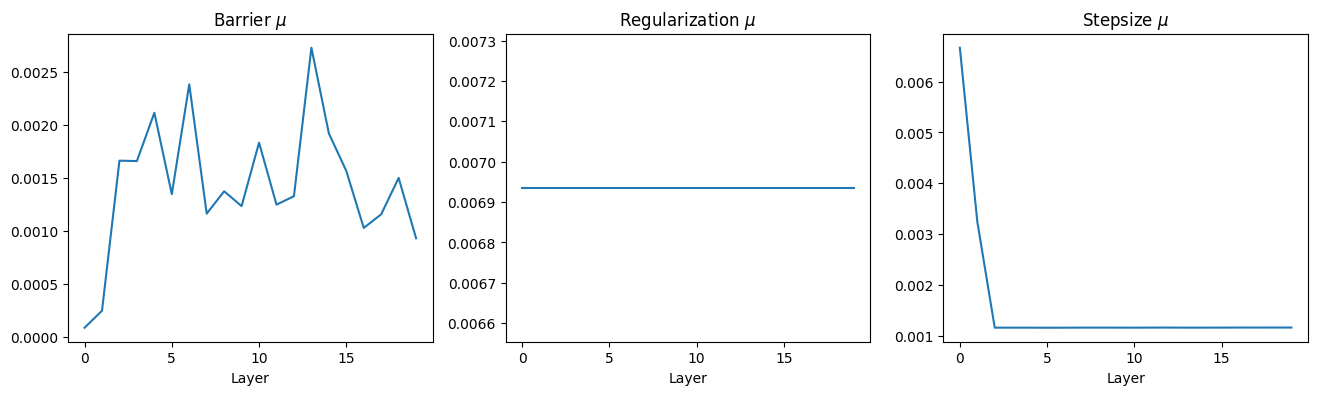

In [24]:
mu_vec = [np.squeeze(exp1.model.Layers[layer_id].mu).item() for layer_id in range(20)]
tau_vec = [np.squeeze(exp1.model.Layers[layer_id].gamma_reg[1]).item() for layer_id in range(20)]
lambda_vec = [np.squeeze(exp1.model.Layers[layer_id].gamma_reg[0]).item() for layer_id in range(20)]

im, ax = plt.subplots(1,3, figsize=(16,4))

ax[0].plot(mu_vec)
ax[0].set_xlabel('Layer')
ax[0].set_title(r'Barrier $\mu$')

ax[1].plot(tau_vec)
ax[1].set_xlabel('Layer')
ax[1].set_title(r'Regularization $\mu$')

ax[2].plot(lambda_vec)
ax[2].set_xlabel('Layer')
ax[2].set_title(r'Stepsize $\mu$')
plt.show()
